In [1]:
import sys
sys.path.append('/home/painchess/projects_clean/Halo_Analytical_Calculations')
import numpy as np
import cosmo_parameters as cp
import halo_mass_function as hmf
import fluctuation_rms as fr
import formation_time as ft
import matplotlib.pyplot as plt
from astropy.cosmology import LambdaCDM


In [7]:
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plt.rcParams["figure.dpi"]= 150
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(params)

# Probability distributions

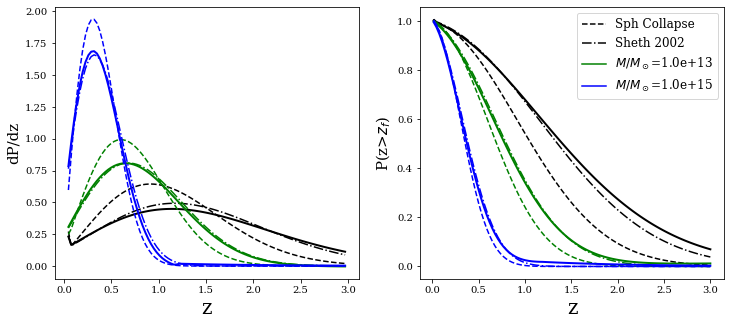

In [12]:
omegas = [0.15,  0.3,  0.5]
sigmas = [0.6, 0.7, 0.75, 0.8, 0.85,  0.9, 1]
mass = [1e11, 1e13, 1e15]
#zs = np.linspace(0.06, 3, 100)
zs = np.linspace(0.015, 3, 100)
dz = zs[1]-zs[0]
colors = ['black', 'green',  'blue']
save=False
fig, axs = plt.subplots(1,2, figsize=[12,5])
for i in range(len(mass)):
    if save:
        res2 = ft.proba(mass[i], zs, acc=1000000, frac=0.5, zi=0.01, sig8=0.8, om0=0.3, ol0=0.7, model='SC', colos=True)
        res = ft.proba(mass[i], zs, acc=1000000, frac=0.5, zi=0.01, sig8=0.8, om0=0.3, ol0=0.7, model='EC', colos=True)
        #res2 = new_proba(mass[i], zs, acc=5000, frac=0.5, zi=0.05, sig8=0.8, om0=0.3, ol0=0.7, model='SC', colos=True)
        res3 = ft.proba(mass[i], zs, acc=1000000, frac=0.5, zi=0.01, sig8=0.8, om0=0.3, ol0=0.7, model='sheth2002', colos=True, alpha=0.615, beta=0.485, a=0.7)
        np.save('./data/pofz_zi_001_M_{:2.1e}_SC'.format(mass[i]), np.array(res2))
        np.save('./data/pofz_zi_001_M_{:2.1e}_zhang'.format(mass[i]), np.array(res))
        np.save('./data/pofz_zi_001_M_{:2.1e}_sheth'.format(mass[i]), np.array(res3))
    else:
        res2 = np.load('./data/pofz_zi_001_M_{:2.1e}_SC.npy'.format(mass[i]))
        res = np.load('./data/pofz_zi_001_M_{:2.1e}_zhang.npy'.format(mass[i]))
        res3 = np.load('./data/pofz_zi_001_M_{:2.1e}_sheth.npy'.format(mass[i]))
    if i == 2:
        for k in range(40, len(res)):
            res[k] = 0.97*res[k-1]
    dpdz1 = (res[2:]-res[:-2])*0.5/dz
    dpdz2 = (res2[2:]-res2[:-2])*0.5/dz
    dpdz3 = (res3[2:]-res3[:-2])*0.5/dz
    if i ==0:
        axs[1].plot(zs, res, color=colors[i], linewidth=2)
        axs[1].plot(zs, res2, '--', color=colors[i], label='Sph Collapse')
        axs[1].plot(zs, res3, '-.', color=colors[i], label='Sheth 2002')
    else:
        axs[1].plot(zs, res, color=colors[i], linewidth=2)
        axs[1].plot(zs, res2, '--', color=colors[i])
        axs[1].plot(zs, res3, '-.', color=colors[i])
        axs[1].plot([], [], color=colors[i], label='$M/M_\odot$={:2.1e}'.format(mass[i]))
    axs[0].plot(zs[1:-1], -dpdz1,linewidth=2,  color=colors[i])
    axs[0].plot(zs[1:-1], -dpdz2, '--', linewidth=1.5, color=colors[i])
    axs[0].plot(zs[1:-1], -dpdz3, '-.', linewidth=1.5, color=colors[i])


axs[1].set_ylabel('P(z>$z_f$)', size=15)
axs[0].set_ylabel('dP/dz', size=15)

axs[0].set_xlabel('z', size=20)
axs[1].set_xlabel('z', size=20)

axs[1].legend()
plt.savefig('./figs/z50_prob_all.png', dpi=650, bbox_inches ='tight', facecolor='white',transparent=False)
plt.savefig('./figs/z50_prob_all.pdf', dpi=650, bbox_inches ='tight', facecolor='white',transparent=False)

### At different cosmos 

In [ ]:
omgs = [0.2, 0.25, 0.3, 0.35, 0.4]
sigs = [0.7,0.8, 0.9, 1]
mass = 1e14
zf = np.linspace(0.05, 2, 1000)
fig, axs = plt.subplots(1,2, figsize=[12,5])
for el, i in enumerate(omgs):
    y1 = ft.proba(mass, zf, om0=el, ol0=1-el, model='EC', colos=True)
    y2 = ft.proba(mass, zf, s8=sigs[i], model='EC', colos=True)
    axs[0].plot(zf, y1, label = '$\Omega_m$ = '+str(omgs[i]))
    axs[1].plot(zf, y2, label = '$\sigma_8$ = '+str(sigs[i]))
for j in range(2):
    axs[j].set_xlabel('z', size=20)
    axs[j].legend()
axs[0].set_ylabel('P ($z_f>z$)', size=20)
#plt.title('SC')


## Average z50

In [ ]:
Mass = np.logspace(9, 15, 50)
s8 = [0.6, 0.8, 1]
oms = [0.15, 0.3, 0.5]
#for el in s8:
fig, axs = plt.subplots(1,2, figsize=[12,5])

for i in range(len(oms)):
    res1, res2 = [], []
    for ms in Mass:
        res1.append(ft.average_formation(M=ms, z=0.15, frac=0.5, om0=oms[i], sig8=0.8, colos=True))
        res2.append(ft.average_formation(M=ms, z=0.15, frac=0.5, om0=0.3, sig8=s8[i], colos=True))

    axs[0].plot(Mass, res1, label='$\Omega_m=$'+str(oms[i]), linewidth=2.5)
    axs[1].plot(Mass, res2, label='$\sigma_8_m=$'+str(s8[i]), linewidth=2.5)
for j in range(2):
    axs[j].set_xlabel('Mass [$h^{-1}M_\odot$]', size = 15)
    axs[j].set_xscale('log')
    axs[j].set_legend(fontsize='x-large')

axs[0].set_ylabel('Average $z_{50}$', size = 15)
#plt.savefig('median_omega_mass.png', dpi=150, bbox_inches ='tight')
plt.show()

## Median z50 

In [ ]:
Mass = np.logspace(9, 15, 50)
s8 = [0.6, 0.8, 1]
oms = [0.15, 0.3, 0.5]
save = False
colors = ['green', 'orange', 'blue']
fig, axs = plt.subplots(1,2, figsize=[12,5])
for i in range(len(oms)):
    if save:
        res_om, res_om2, res_s8, res_s82 = [], [], [], []
        for ms in Mass:
            res_om.append(ft.median_formation(M=ms, z=0.15, frac=0.5, om0=oms[i], sig8=0.8, colos=True, outc=False))
            res_om2.append(ft.median_formation(M=ms, z=0.15, frac=0.5, om0=oms[i], sig8=0.8, colos=True, model='SC', outc=False))
            
            res_s8.append(ft.median_formation(M=ms, z=0.15, frac=0.5, om0=0.3, sig8=s8[i], colos=True, outc=False))
            res_s82.append(ft.median_formation(M=ms, z=0.15, frac=0.5, om0=0.3, sig8=s8[i], colos=True, model='SC', outc=False))
    
        np.savetxt('./data/med_EC_om{:2.1f}.txt'.format(oms[i]), np.array(res_om))
        np.savetxt('./data/med_SC_om{:2.1f}.txt'.format(oms[i]), np.array(res_om2))
        
        np.savetxt('./data/med_EC_s8{:2.1f}.txt'.format(s8[i]), np.array(res_s8))
        np.savetxt('./data/med_SC_s8{:2.1f}.txt'.format(s8[i]), np.array(res_s82))

    else:
        res_om = np.loadtxt('./data/med_EC_om{:2.1f}.txt'.format(oms[i]))
        res_om2 = np.loadtxt('./data/med_SC_om{:2.1f}.txt'.format(oms[i]))
    
        res_s8 = np.loadtxt('./data/med_EC_s8{:2.1f}.txt'.format(s8[i]))
        res_s82 = np.loadtxt('./data/med_SC_s8{:2.1f}.txt'.format(s8[i]))
    
    axs[0].plot(Mass, res_om, label='$\Omega_m=$'+str(oms[i]), color = colors[i], linewidth=2)
    axs[0].plot(Mass, res_om2, '--', linewidth=1.5, color=colors[i])

    axs[1].plot(Mass, res_s8, label='$\sigma_8=$'+str(s8[i]), color = colors[i], linewidth=2)
    axs[1].plot(Mass, res_s82, '--', linewidth=1.5, color=colors[i])


for j in range(2):
    axs[j].set_xlabel('Mass [$h^{-1}M_\odot$]', size = 15)
    axs[j].set_xscale('log')
    axs[j].set_legend(fontsize='x-large')

axs[0].set_ylabel('Median $z_{50}$', size = 15)
plt.savefig('./figs/median_mass.pdf', dpi=650, bbox_inches ='tight')
plt.show()

## Cosmology vs AGE 

In [ ]:
Mass = np.logspace(11, 15, 5)
sze = 25
save = True
omv = np.linspace(0.15, 0.5, sze)
s8 = np.linspace(0.6, 1.1, sze)
x = np.array([omv]*sze).transpose()
y = np.array([s8]*sze)
for ms in Mass:
    if save:
        nom = np.zeros((sze,sze))
        for i in range(sze):
            for j in range(sze):
                nom[i,j] = ft.median_formation(M=ms, z=0.01, frac=0.5, om0=omv[i], sig8= s8[j], colos=True, outc=False)
        np.savetxt('./data/median_om_s8_'+str(int(np.log10(ms)))+'.txt', nom)
    else:
        nom = np.loadtxt('./data/median_om_s8_'+str(int(np.log10(ms)))+'.txt')
    plt.contourf(x, y, nom, levels=60, cmap='turbo')
    plt.annotate('log M='+str(round(np.log10(ms),2)),(0.3, 0.8), size=15)
    plt.title('AGE',  size=30)
    plt.xlabel('$\Omega_m$', size = 30)
    plt.ylabel('$\sigma_8$', size = 30)
    plt.colorbar()
    plt.savefig('./figs/new_median_om_s8_'+str(int(np.log10(ms)))+'.pdf', dpi=650, bbox_inches ='tight',facecolor='white')
    plt.savefig('./figs/new_median_om_s8_'+str(int(np.log10(ms)))+'.png', dpi=650, bbox_inches ='tight',facecolor='white')

    plt.show()

# z50 and HMF 

In [ ]:
masses = [5e13, 5e14, 5e15]
#Mass = np.logspace(13, 15, 3)
sze = 40
#for ms in Mass: 
omv = np.linspace(0.15, 0.5, sze)
s8 = np.linspace(0.6, 1.1, sze)
nom = np.zeros((sze,sze))
nom2 = np.zeros((sze,sze))
x = np.array([omv]*sze).transpose()
y = np.array([s8]*sze)
save=False
for mass in masses:
    for red in zs:
        if save:
            for i in range(sze):
                for j in range(sze):
                    cosmo = LambdaCDM(H0=100*cp.h, Om0=omv[i], Ode0=1-omv[i], Ob0=cp.omb)
                    vol = cosmo.differential_comoving_volume(red).value*cp.h**3
                    nom[i,j] = ft.median_formation(M=mass, z=0.01+red, acc=1000, frac=0.5, om0=omv[i], model='EC', ol0=1-omv[i], sig8=s8[j], colos=False, outc=False)
                    nom2[i,j] = np.log10(vol*hmf.hmf(M=mass, z=red, sig8=s8[j], om0=omv[i], ol0=1-omv[i],
                                                              kmax=5, prec=100, camb=False, model='sheth', out='dndlnM'))
            np.savetxt('./data/n_z50_cross_z_{:1.0f}_M_{:2.0e}.txt'.format(red, mass), nom)
            np.savetxt('./data/n_hmf_cross_z_{:1.0f}_M_{:2.0e}.txt'.format(red, mass), nom2)
        else:
            nom = np.loadtxt('./data/n_z50_cross_z_{:1.0f}_M_{:2.0e}.txt'.format(red, mass))
            nom2 = np.loadtxt('./data/n_hmf_cross_z_{:1.0f}_M_{:2.0e}.txt'.format(red, mass))
        plt.contour(x, y, nom, levels=20, linestyles='dashed', cmap='gnuplot', alpha=1)
        plt.colorbar()
        plt.contourf(x, y, nom2, levels=40, cmap = 'turbo', alpha=0.7)

        plt.title('z={:2.1f}, M={:2.1e}$M_\odot/h$'.format(red, mass), size=15)
        plt.xlabel('$\Omega_m$', size = 15)
        plt.ylabel('$\sigma_8$', size = 15)

        plt.savefig('./figs/n_z50_hmf_cross_z_{:1.0f}_M_{:2.0e}.pdf'.format(red, mass), dpi=650, bbox_inches='tight', facecolor='white',transparent=False)
        plt.savefig('./figs/n_z50_hmf_cross_z_{:1.0f}_M_{:2.0e}.png'.format(red, mass), dpi=650, bbox_inches='tight', facecolor='white',transparent=False)        
        plt.show()

## Median z50 vs cosmo

Text(0, 0.5, 'Median $z_{50}$')

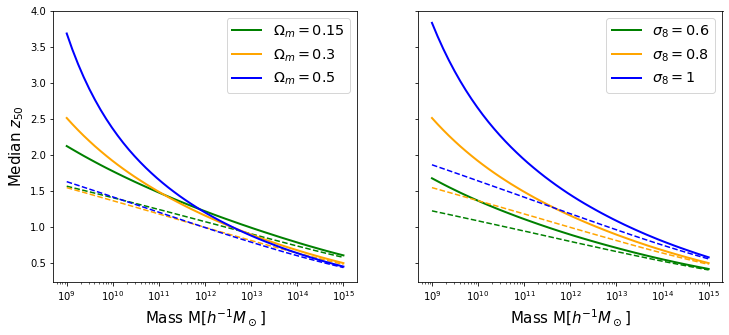

In [6]:
Mass = np.logspace(9, 15, 50)
s8 = [0.6, 0.8, 1]
oms = [0.15, 0.3, 0.5]
save = False
colors = ['green', 'orange', 'blue']
fig, axs = plt.subplots(1,2, sharey=True, figsize=[12,5])
for i in range(len(oms)):
    if save:
        res = []
        res2 = []
        for ms in Mass:
            res_om.append(ft.median_formation(M=ms, z=0.15, frac=0.5, om0=oms[i], sig8=0.8, colos=True, outc=False))
            res2_om.append(ft.median_formation(M=ms, z=0.15, frac=0.5, om0=oms[i], sig8=0.8, colos=True, model='SC', outc=False))
            res_s.append(ft.median_formation(M=ms, z=0.15, frac=0.5, om0=0.3, sig8=s8[i], colos=True, outc=False))
            res2_s.append(ft.median_formation(M=ms, z=0.15, frac=0.5, om0=0.3, sig8=s8[i], colos=True, model='SC', outc=False))
        
        np.savetxt('./data/med_EC_s8{:2.1f}.txt'.format(s8[i]),np.array(res_s))
        np.savetxt('./data/med_SC_s8{:2.1f}.txt'.format(s8[i]),np.array(res2_s))

        np.savetxt('./data/med_EC_om{:2.1f}.txt'.format(oms[i]),np.array(res_om))
        np.savetxt('./data/med_SC_om{:2.1f}.txt'.format(oms[i]),np.array(res2_om))
    else:
        res_om = np.loadtxt('./data/med_EC_om{:2.1f}.txt'.format(oms[i]))
        res2_om = np.loadtxt('./data/med_SC_om{:2.1f}.txt'.format(oms[i]))
        
        res_s = np.loadtxt('./data/med_EC_s8{:2.1f}.txt'.format(s8[i]))
        res2_s = np.loadtxt('./data/med_SC_s8{:2.1f}.txt'.format(s8[i]))
    axs[1].plot(Mass, res_s, label='$\sigma_8=$'+str(s8[i]), color = colors[i], linewidth=2)
    axs[1].plot(Mass, res2_s, '--', linewidth=1.5, color=colors[i])

    axs[0].plot(Mass, res_om, label='$\Omega_m=$'+str(oms[i]), color = colors[i], linewidth=2)
    axs[0].plot(Mass, res2_om, '--', linewidth=1.5, color=colors[i])
for j in range(2):
    axs[j].set_xlabel('Mass M[$h^{-1}M_\odot$]', size = 15)
    axs[j].set_xscale('log')
    axs[j].legend(fontsize='x-large')
axs[0].set_ylabel('Median $z_{50}$', size = 15)
plt.savefig('./figs/median_omega_mass.pdf', dpi=650, bbox_inches ='tight')
plt.savefig('./figs/median_omega_mass.png', dpi=650, bbox_inches ='tight')


#  In the M vs z plane 

## $D\nu = \nu(M_0) - \nu(M_1)$

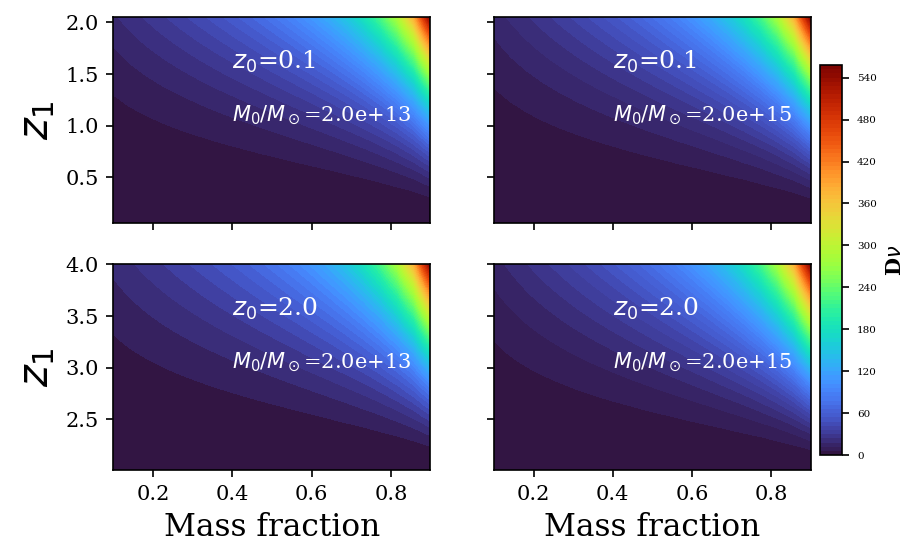

In [8]:
zis = [0.05, 2]
M0s = [2e13, 2e15]
size = 20
frac = np.linspace(0.1, 0.9, size)

sig8 = np.linspace(0.6, 1.1, size)
omv = np.linspace(0.15, 0.5, size)
x = np.array([frac]*size).transpose()

fig, axs =  plt.subplots(2,2)
nom = np.zeros((size, size))
for k in range(len(zis)):
    zi = zis[k]
    zfs = np.linspace(zi+0.01, zi+2, size)
    y = np.array([zfs]*size)
    for l in range(len(M0s)):
        M0=M0s[l]
        ax = axs[k,l]
        for i in range(size):
            for j in range(size):
                ddc = (cp.delta_c(zfs[j]) - cp.delta_c(zi))**2
                dS = fr.sigma(frac[i]*M0)**2 - fr.sigma(M0)**2
                nom[i,j] = ddc/dS
        im = ax.contourf(x, y, nom, levels=100, cmap='turbo')
        ax.annotate('$z_0$={:2.1f}'.format(zi), (0.4, zi+1.5), color='white', size=12)
        ax.annotate('$M_0/M_\odot$={:2.1e}'.format(M0), (0.4, zi+1), color='white', size=10)
        if k+l==2:
            cax = fig.add_axes([0.91, 0.15, 0.025, 0.65])
            cbar = fig.colorbar(im, cax=cax)
            cbar.set_label(r'D$\nu$', weight='bold')
            cbar.ax.tick_params(labelsize=5)
for ax in axs.flat:
    ax.set(xlabel='Mass fraction', ylabel='$z_1$')
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(15)
    ax.label_outer()

plt.savefig('./figs/Dnu.pdf', bbox_inches='tight', dpi=300)
plt.savefig('./figs/Dnu.png', bbox_inches='tight', dpi=300)

## In log

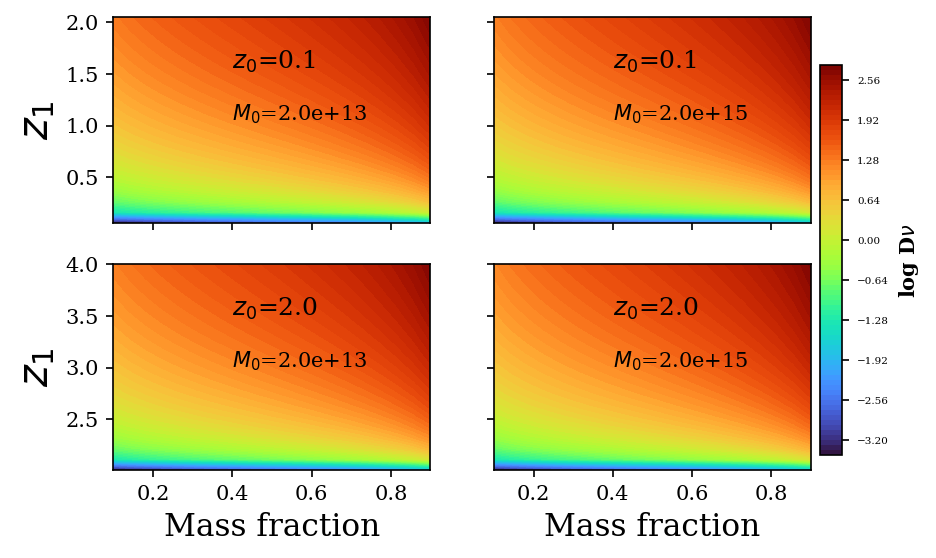

In [9]:
zis = [0.05, 2]
M0s = [2e13, 2e15]
size = 20
frac = np.linspace(0.1, 0.9, size)

sig8 = np.linspace(0.6, 1.1, size)
omv = np.linspace(0.15, 0.5, size)
x = np.array([frac]*size).transpose()

fig, axs =  plt.subplots(2,2)
nom = np.zeros((size, size))
for k in range(len(zis)):
    zi = zis[k]
    zfs = np.linspace(zi+0.01, zi+2, size)
    y = np.array([zfs]*size)
    for l in range(len(M0s)):
        M0=M0s[l]
        ax = axs[k,l]
        for i in range(size):
            for j in range(size):
                ddc = (cp.delta_c(zfs[j]) - cp.delta_c(zi))**2
                dS = fr.sigma(frac[i]*M0)**2 - fr.sigma(M0)**2
                nom[i,j] = np.log10(ddc/dS)
        im = ax.contourf(x, y, nom, levels=100, cmap='turbo')
        ax.annotate('$z_0$={:2.1f}'.format(zi), (0.4, zi+1.5), size=12)
        ax.annotate('$M_0$={:2.1e}'.format(M0), (0.4, zi+1), size=10)
        if k+l==2:
            cax = fig.add_axes([0.91, 0.15, 0.025, 0.65])
            cbar = fig.colorbar(im, cax=cax)
            cbar.set_label(r'log D$\nu$', weight='bold')
            cbar.ax.tick_params(labelsize=5)
            
for ax in axs.flat:
    ax.set(xlabel='Mass fraction', ylabel='$z_1$')
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(15)
    ax.label_outer()

plt.savefig('./figs/log_Dnu.pdf', dpi=300)
plt.savefig('./figs/log_Dnu.png', dpi=300)

## f(M,z) : Progenitor Mass Function

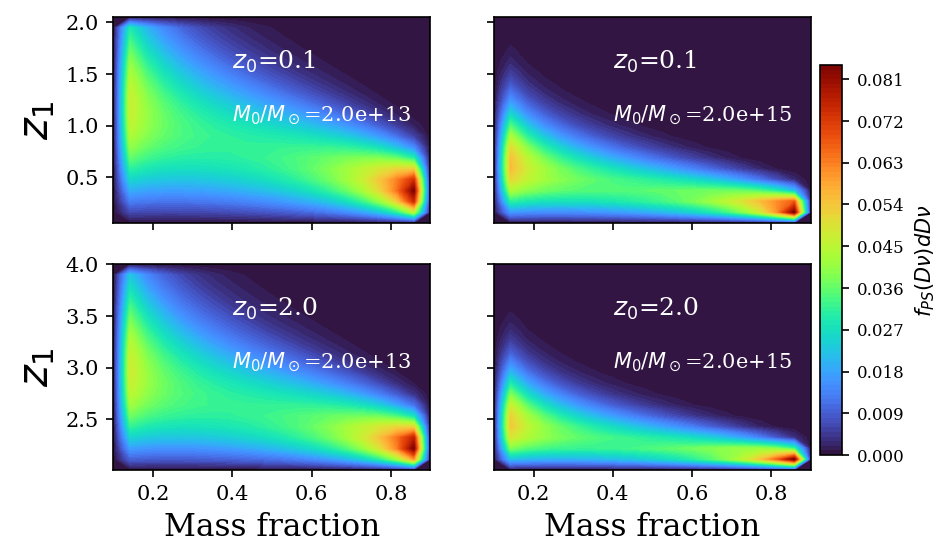

In [10]:
zis = [0.05, 2]
M0s = [2e13, 2e15]
size = 20
frac = np.linspace(0.1, 0.9, size)

sig8 = np.linspace(0.6, 1.1, size)
omv = np.linspace(0.15, 0.5, size)
x = np.array([frac]*size).transpose()

fig, axs =  plt.subplots(2,2)
nom = np.zeros((size, size))
for k in range(len(zis)):
    zi = zis[k]
    zfs = np.linspace(zi+0.01, zi+2, size)
    y = np.array([zfs]*size)
    for l in range(len(M0s)):
        M0=M0s[l]
        ax = axs[k,l]
        for i in range(1, size-1):
            for j in range(1, size-1):
                ddc = (cp.delta_c(zfs[j]) - cp.delta_c(zi))**2
                dS = fr.sigma((frac[i-1:i+2])*M0)**2 - fr.sigma(M0)**2
                dnu = np.sqrt(ddc/dS)
                ddnu = (dnu[2]-dnu[0])*0.5
                nom[i,j] = ddnu*hmf.fps(dnu[1])/dnu[1]
        im = ax.contourf(x, y, nom, levels=100, cmap='turbo')
        ax.annotate('$z_0$={:2.1f}'.format(zi), (0.4, zi+1.5), color='white', size=12)
        ax.annotate('$M_0/M_\odot$={:2.1e}'.format(M0), (0.4, zi+1), color='white', size=10)
        if k+l==2:
            cax = fig.add_axes([0.91, 0.15, 0.025, 0.65])
            cbar = fig.colorbar(im, cax=cax)
            cbar.set_label(r'$f_{PS}(D\nu)dD\nu$', weight='bold')
            cbar.ax.tick_params(labelsize=8)
for ax in axs.flat:
    ax.set(xlabel='Mass fraction', ylabel='$z_1$')
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(15)
    ax.label_outer()


plt.savefig('./figs/pmf_Dnu.pdf',bbox_inches='tight', dpi=300)
plt.savefig('./figs/pmf_Dnu.png',bbox_inches='tight', dpi=300)



## M1/M0 x PMF

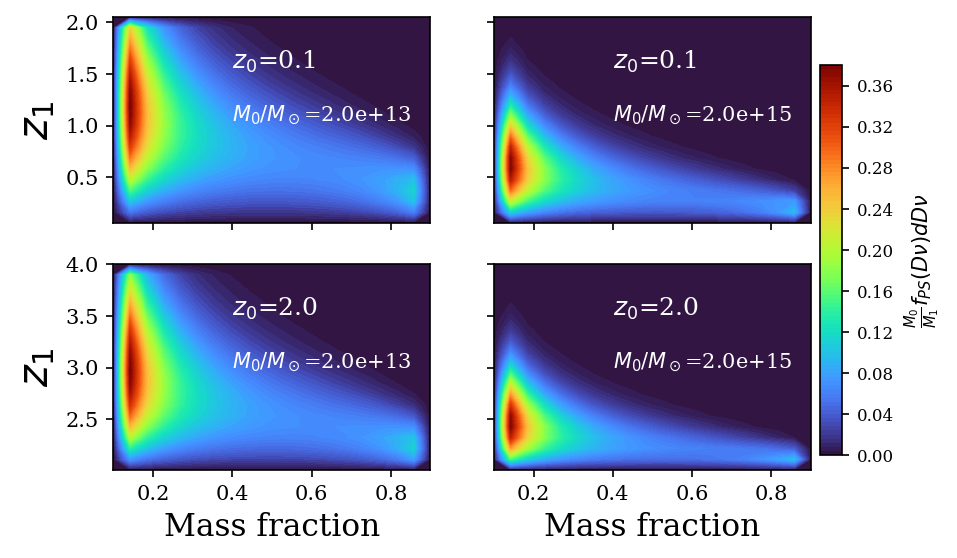

In [11]:
zis = [0.05, 2]
M0s = [2e13, 2e15]
size = 20
frac = np.linspace(0.1, 0.9, size)

sig8 = np.linspace(0.6, 1.1, size)
omv = np.linspace(0.15, 0.5, size)
x = np.array([frac]*size).transpose()

fig, axs =  plt.subplots(2,2)
nom = np.zeros((size, size))
for k in range(len(zis)):
    zi = zis[k]
    zfs = np.linspace(zi+0.01, zi+2, size)
    y = np.array([zfs]*size)
    for l in range(len(M0s)):
        M0=M0s[l]
        ax = axs[k,l]
        for i in range(1, size-1):
            for j in range(1, size-1):
                ddc = (cp.delta_c(zfs[j]) - cp.delta_c(zi))**2
                dS = fr.sigma((frac[i-1:i+2])*M0)**2 - fr.sigma(M0)**2
                dnu = np.sqrt(ddc/dS)
                ddnu = (dnu[2]-dnu[0])*0.5
                nom[i,j] = ddnu*hmf.fps(dnu[1])/(dnu[1]*frac[i])
        im = ax.contourf(x, y, nom, levels=100, cmap='turbo')
        ax.annotate('$z_0$={:2.1f}'.format(zi), (0.4, zi+1.5), color='white', size=12)
        ax.annotate('$M_0/M_\odot$={:2.1e}'.format(M0), (0.4, zi+1), color='white', size=10)
        if k+l==2:
            cax = fig.add_axes([0.91, 0.15, 0.025, 0.65])
            cbar = fig.colorbar(im, cax=cax)
            cbar.set_label(r'$\frac{M_0}{M_1}f_{PS}(D\nu)dD\nu$', weight='bold')
            cbar.ax.tick_params(labelsize=8)
for ax in axs.flat:
    ax.set(xlabel='Mass fraction', ylabel='$z_1$')
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(15)
    ax.label_outer()

plt.savefig('./figs/frac_pmf_Dnu.pdf', bbox_inches='tight', dpi=300)
plt.savefig('./figs/frac_pmf_Dnu.png', bbox_inches='tight', dpi=300)


## D$\nu$ vs $\Omega_m-\sigma_8$

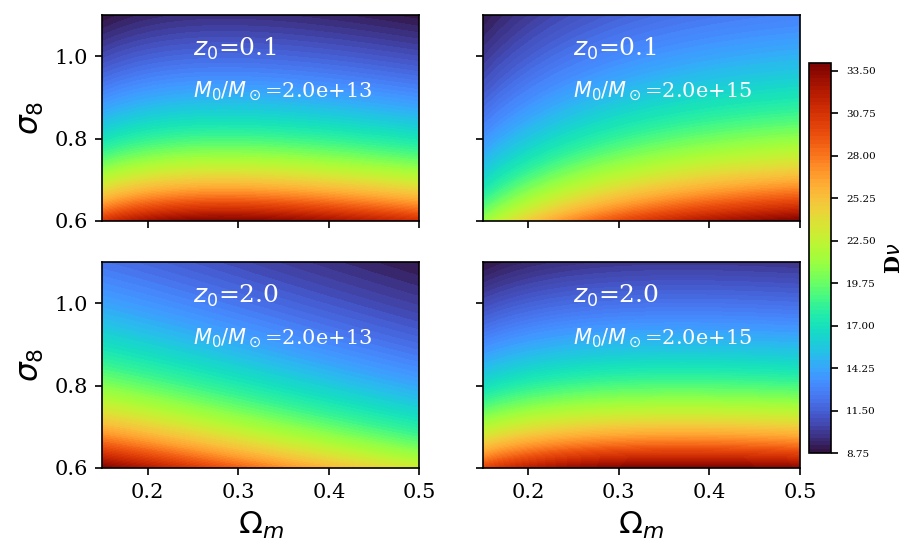

In [12]:
zis = [0.05, 2]
M0s = [2e13, 2e15]
size = 20
frac = np.linspace(0.1, 0.9, size)

sig8 = np.linspace(0.6, 1.1, size)
omv = np.linspace(0.15, 0.5, size)
x = np.array([omv]*size).transpose()
y = np.array([sig8]*size)

fig, axs =  plt.subplots(2,2)
nom = np.zeros((size, size))
for k in range(len(zis)):
    zi = zis[k]
    for l in range(len(M0s)):
        M0=M0s[l]
        ax = axs[k,l]
        for i in range(size):
            for j in range(size):
                ddc = (cp.delta_c(zi+1, om0=omv[i], ol0=1-omv[i]) - cp.delta_c(zi, om0=omv[i], ol0=1-omv[i]))**2
                dS = fr.sigma(0.5*M0, om0=omv[i], ol0=1-omv[i], sig8=sig8[j])**2 - fr.sigma(M0, om0=omv[i], ol0=1-omv[i], sig8=sig8[j])**2
                nom[i,j] = ddc/dS
        im = ax.contourf(x, y, nom, levels=100, cmap='turbo')
        ax.annotate('$z_0$={:2.1f}'.format(zi), (0.25, 1), color='white', size=12)
        ax.annotate('$M_0/M_\odot$={:2.1e}'.format(M0), (0.25, 0.9), color='white', size=10)
        if k+l==2:
            cax = fig.add_axes([0.91, 0.15, 0.025, 0.65])
            cbar = fig.colorbar(im, cax=cax)
            cbar.set_label(r'D$\nu$', weight='bold')
            cbar.ax.tick_params(labelsize=5)
for ax in axs.flat:
    ax.set(xlabel='$\Omega_m$', ylabel='$\sigma_8$')
    ax.yaxis.label.set_size(15)
    ax.xaxis.label.set_size(15)
    ax.label_outer()

plt.savefig('./figs/Dnu_om_s8.pdf', bbox_inches='tight', dpi=300)
plt.savefig('./figs/Dnu_om_s8.png', bbox_inches='tight', dpi=300)